<h1>Hospital Readmissions Prediction</h1>

<h3>Hospital Readmissions Reduction Program (HRRP)</h3>

The Hospital Readmissions Reduction Program (HRRP) is a Medicare value-based purchasing program that reduces payments to hospitals with excess readmissions. The program supports the national goal of improving healthcare for Americans by linking payment to the quality of hospital care.

<h3>Data Set Information:</h3>

Data has been taken from https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#

<h4>Credits:  UCI Machine Learning Repository</h4>

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.



<h3>Problem Statement</h3>

1. Identify whether patient gets Readmitted or not within 30 days.
2. This could be useful to instantly provide Readmission status of a patient.

<h2>Evaluation Metric</h2>

<h6>Area Under Curve</h6>

<h3>Analysis</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

<h4>Reading Data</h4>

In [2]:
#storing data into a data frame
data=pd.read_csv('C:/Users/bogga/Desktop/dataset_diabetes/diabetic_data.csv')

In [3]:
#Printing top 5 rows from the data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#High level statistics on each numerical features
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Here Encounterid and patient nbr represents an identifier column. We can remove these features for further analysis

In [5]:
#Info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Some of the features are integer and have mappings in other file.

we will update those features with original names and will update feature as string.

In [6]:
#Reading of Mapping File
#There is one mapping file which contains all mappings. I manually created that file into three 
#different files for reading and updating mapped columns
Mappings=pd.read_csv('C:/Users/bogga/Desktop/dataset_diabetes/IDs_mapping.csv')

In [7]:
#Mappings regarding Admission Type ID
Mappings.head(8)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [8]:
#Reading Admission Source Mapping File
Admission_Source_Mapping=pd.read_csv('C:/Users/bogga/Desktop/dataset_diabetes/Admission_Source_Mapping.txt')

In [9]:
#Creating dictionary to update values with category names
dict_admission_source={}
for index, row in Admission_Source_Mapping.iterrows():
    #print(row['admission_source_id'], row['description'])
    dict_admission_source[row['admission_source_id']]=row['description']

In [10]:
#Updating the numerical values which are actually categorical with their category names
for index, row in pd.DataFrame(data['admission_source_id']).iterrows():
    data.at[index,'admission_source_category']=dict_admission_source.get(row['admission_source_id'])

In [11]:
#Reading Dischare Disposition mapping file.
Dischare_Disposition_Mapping=pd.read_csv('C:/Users/bogga/Desktop/dataset_diabetes/Dischare_Disposition.txt')

In [12]:
#Creating dictionary to update values with category names
dict_disposition_source={}
for index, row in Dischare_Disposition_Mapping.iterrows():
    #print(row['admission_source_id'], row['description'])
    dict_disposition_source[row['discharge_disposition_id']]=row['description']

In [13]:
#Updating the numerical values which are actually categorical with their category names
for index, row in pd.DataFrame(data['discharge_disposition_id']).iterrows():
    data.at[index,'discharge_disposition_category']=dict_disposition_source.get(row['discharge_disposition_id'])

In [14]:
#printing the value counts of each category in discharge_position_category
data['discharge_disposition_category'].value_counts()

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                                                                                     989
Discharged/transferred to ICF                                                   

In [15]:
#Checking the count of class labels
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [16]:
(data['readmitted'].value_counts()/data['readmitted'].count())*100

NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64

#### We are treating this as binary classification problem. So we will remove data with patients who are readmitted after 30 days.

This data is imbalanced, as only 11% of data is having patients with less than 30 days readmission.

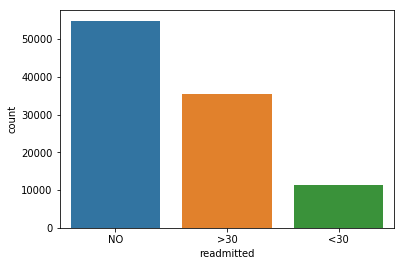

In [17]:
#Count plot of class label
sns.countplot(x=data['readmitted'],data=data)

Most of the data is having No readmissions.
That's the reason we are choosing AUC as performance metric.

In [18]:
#Occurences of RACE Category for each class label.
pd.crosstab(data['race'],data['readmitted'])

readmitted,<30,>30,NO
race,,,
?,188,538,1547
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,145,446,915


There are five categories for Race Feature(AfricanAmerican,Asian, Caucasian, Hispanic and other ).
We have several missing values in this feature. we will make these missing values as a new category UNKNOWN_RACE

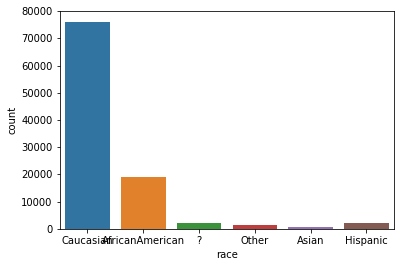

In [19]:
sns.countplot(data['race'],data=data)

Most of the data points belong to Caucasian followed by AsianAmerican.

#### Analysis on Gender Feature

In [20]:
pd.crosstab(data['gender'],data['readmitted'])

readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823
Unknown/Invalid,0,0,3


There are three data points has a gender value as Unknown/Invalid. So we will eliminate those records.

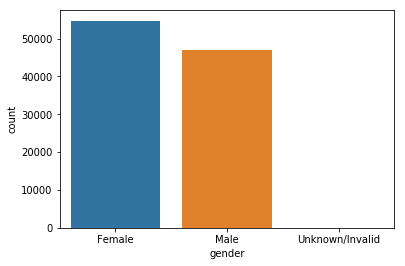

In [21]:
sns.countplot(data['gender'],data=data)

Gender values are almost equal with little difference in count

#### Analysis on Age Feature

In [22]:
pd.crosstab(data['age'],data['readmitted'])

readmitted,<30,>30,NO
age,,,
[0-10),3,26,132
[10-20),40,224,427
[20-30),236,510,911
[30-40),424,1187,2164
[40-50),1027,3278,5380
[50-60),1668,5917,9671
[60-70),2502,7897,12084
[70-80),3069,9475,13524
[80-90),2078,6223,8896


Here Age Feature is not a numerical column. It is binned Feature.
We will update binned values with numerical values.

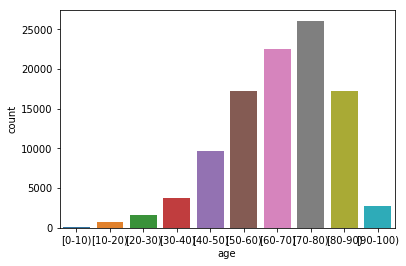

In [23]:
sns.countplot(data['age'],data=data)

Count of occurences of Age bins are more for people with 50 to 90 years age.

#### Analysis of Weight Feature

In [24]:
pd.crosstab(data['weight'],data['readmitted'])

readmitted,<30,>30,NO
weight,,,
>200,0,3,0
?,11000,34035,53534
[0-25),8,31,9
[100-125),67,292,266
[125-150),12,69,64
[150-175),3,16,16
[175-200),1,5,5
[25-50),8,42,47
[50-75),105,389,403


In [25]:
(data['weight'].value_counts()/data['weight'].count())*100

?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64

For weight feature, most of values are missing. 96% of the data is missing. So it is wise to eliminate this feature for analysis and processing. 

##### Updating Admission Type ID with their Mapping categories

In [26]:
#admission_type_id is integer type feature, so converting it into str
data['admission_type_id']=data['admission_type_id'].astype('str')

In [27]:
#Replacing values with categories
data['admission_type_id']=data['admission_type_id'].str.replace('1','Emergency')
data['admission_type_id']=data['admission_type_id'].str.replace('2','Urgent')
data['admission_type_id']=data['admission_type_id'].str.replace('3','Elective')
data['admission_type_id']=data['admission_type_id'].str.replace('4','Newborn')
data['admission_type_id']=data['admission_type_id'].str.replace('5','Not Available')
data['admission_type_id']=data['admission_type_id'].str.replace('6','NaN')
data['admission_type_id']=data['admission_type_id'].str.replace('7','Trauma Center')
data['admission_type_id']=data['admission_type_id'].str.replace('8','Not Mapped')

In [28]:
#count of occurences of admission_type_id
data['admission_type_id'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NaN               5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [29]:
pd.crosstab(data['admission_type_id'],data['readmitted'])

readmitted,<30,>30,NO
admission_type_id,,,
Elective,1961,5746,11162
Emergency,6221,19309,28460
NaN,586,2231,2474
Newborn,1,2,7
Not Available,495,1721,2569
Not Mapped,27,84,209
Trauma Center,0,0,21
Urgent,2066,6452,9962


We will update Nan and Not mapped columns with Not_Mapped_Addmission_Type_ID

#### Analysis on discharge_disposition_category

In [30]:
pd.crosstab(data['discharge_disposition_category'],data['readmitted'])

readmitted,<30,>30,NO
discharge_disposition_category,,,
Admitted as an inpatient to this hospital,9,2,10
Discharged to home,5602,21517,33115
Discharged/transferred to ICF,104,278,433
Discharged/transferred to SNF,2046,4916,6992
Discharged/transferred to a federal health care facility.,0,1,4
Discharged/transferred to a long term care hospital.,30,144,238
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,7,16,25
Discharged/transferred to another rehab fac including rehab units of a hospital .,552,519,922
Discharged/transferred to another short term hospital,342,668,1118


### Analysing Numerical columns

#### Analysis of Time in Hospital Feature

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


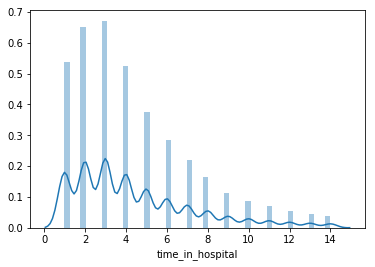

In [31]:
sns.distplot(data['time_in_hospital'])

Above distribution represents time they have spent in the hospital.

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


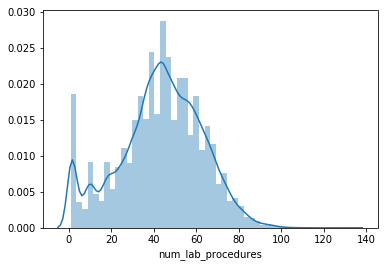

In [32]:
sns.distplot(data['num_lab_procedures'])

Here data points for number of lab procedures are more for 40 to 60 number.

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


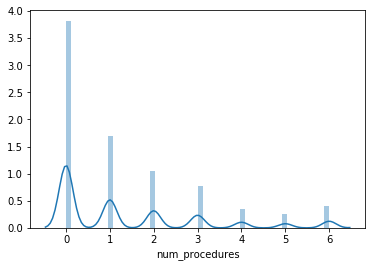

In [33]:
sns.distplot(data['num_procedures'])

This distribution represents the number of procedures they have gone through for that encounter.

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


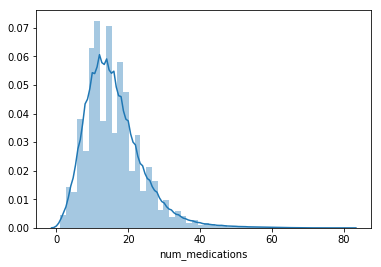

In [34]:
sns.distplot(data['num_medications'])

This distribution represents number of medications patients has gone through.

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


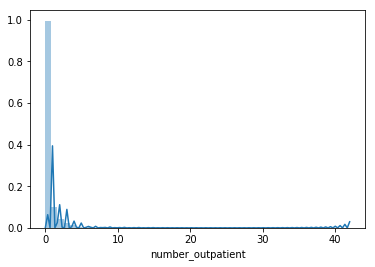

In [35]:
sns.distplot(data['number_outpatient'])

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


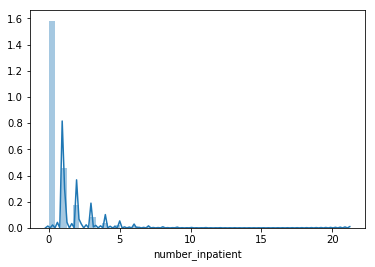

In [36]:
sns.distplot(data['number_inpatient'])

The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.

Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.

Patients receiving outpatient care don’t need to spend a night in a hospital. They're free to leave the doctor’s office, outpatient clinic or hospital once the procedure is over. Sometimes, they need to wait while anesthesia wears off or to make sure there aren’t any complications. As long as there aren’t any serious complications, though, patients don’t have to spend the night being supervised.

C:\Users\bogga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


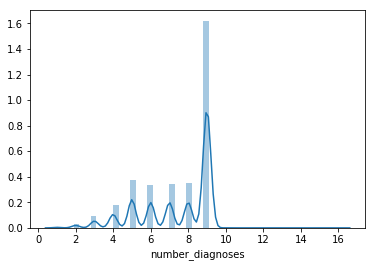

In [37]:
sns.distplot(data['number_diagnoses'])

#### Observing unique codes in each Diagnosis Feature

In [38]:
len(data['diag_1'].unique())

717

In [39]:
len(data['diag_2'].unique())

749

In [40]:
len(data['diag_3'].unique())

790

#### Several Features contain medical tests performed on patients.


#### Analysis on Medical tests

In [41]:
data['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [42]:
pd.crosstab(data['max_glu_serum'],data['readmitted'])

readmitted,<30,>30,NO
max_glu_serum,,,
>200,185,530,770
>300,181,521,562
None,10696,33609,52115
Norm,295,885,1417


In [42]:
data['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [43]:
pd.crosstab(data['A1Cresult'],data['readmitted'])

readmitted,<30,>30,NO
A1Cresult,,,
>7,383,1300,2129
>8,811,2901,4504
None,9681,29745,45322
Norm,482,1599,2909


In [44]:
data['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [45]:
pd.crosstab(data['metformin'],data['readmitted'])

readmitted,<30,>30,NO
metformin,,,
Down,69,190,316
No,9418,28839,43521
Steady,1782,6169,10395
Up,88,347,632


In [44]:
data['repaglinide'].value_counts()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [46]:
pd.crosstab(data['repaglinide'],data['readmitted'])

readmitted,<30,>30,NO
repaglinide,,,
Down,3,19,23
No,11152,34905,54170
Steady,182,588,614
Up,20,33,57


In [47]:
data['nateglinide'].value_counts()

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

In [48]:
pd.crosstab(data['nateglinide'],data['readmitted'])

readmitted,<30,>30,NO
nateglinide,,,
Down,1,4,6
No,11277,35283,54503
Steady,78,248,342
Up,1,10,13


In [49]:
data['chlorpropamide'].value_counts()

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

In [50]:
pd.crosstab(data['chlorpropamide'],data['readmitted'])

readmitted,<30,>30,NO
chlorpropamide,,,
Down,0,0,1
No,11352,35511,54817
Steady,5,29,45
Up,0,5,1


In [51]:
data['glimepiride'].value_counts()

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

In [52]:
pd.crosstab(data['glimepiride'],data['readmitted'])

readmitted,<30,>30,NO
glimepiride,,,
Down,25,68,101
No,10827,33638,52110
Steady,468,1737,2465
Up,37,102,188


In [53]:
data['acetohexamide'].value_counts()

No        101765
Steady         1
Name: acetohexamide, dtype: int64

In [54]:
pd.crosstab(data['acetohexamide'],data['readmitted'])

readmitted,<30,>30,NO
acetohexamide,,,
No,11357,35544,54864
Steady,0,1,0


In [55]:
data['glipizide'].value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [56]:
pd.crosstab(data['glipizide'],data['readmitted'])

readmitted,<30,>30,NO
glipizide,,,
Down,85,211,264
No,9905,30815,48360
Steady,1268,4233,5855
Up,99,286,385


In [57]:
data['glyburide'].value_counts()

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64

In [58]:
pd.crosstab(data['glyburide'],data['readmitted'])

readmitted,<30,>30,NO
glyburide,,,
Down,52,223,289
No,10225,31827,49064
Steady,995,3221,5058
Up,85,274,453


In [59]:
data['tolbutamide'].value_counts()

No        101743
Steady        23
Name: tolbutamide, dtype: int64

In [60]:
pd.crosstab(data['tolbutamide'],data['readmitted'])

readmitted,<30,>30,NO
tolbutamide,,,
No,11356,35538,54849
Steady,1,7,15


In [61]:
data['pioglitazone'].value_counts()

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64

In [62]:
pd.crosstab(data['pioglitazone'],data['readmitted'])

readmitted,<30,>30,NO
pioglitazone,,,
Down,18,45,55
No,10583,32788,51067
Steady,727,2620,3629
Up,29,92,113


In [63]:
data['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [64]:
data['citoglipton'].value_counts()

No    101766
Name: citoglipton, dtype: int64

In [65]:
data['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [66]:
pd.crosstab(data['insulin'],data['readmitted'])

readmitted,<30,>30,NO
insulin,,,
Down,1698,4752,5768
No,4756,15949,26678
Steady,3433,10482,16934
Up,1470,4362,5484


In [67]:
data['glyburide-metformin'].value_counts()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64

In [68]:
pd.crosstab(data['glyburide-metformin'],data['readmitted'])

readmitted,<30,>30,NO
glyburide-metformin,,,
Down,1,0,5
No,11279,35287,54494
Steady,77,257,358
Up,0,1,7


In [69]:
data['glipizide-metformin'].value_counts()

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

In [70]:
pd.crosstab(data['glipizide-metformin'],data['readmitted'])

readmitted,<30,>30,NO
glipizide-metformin,,,
No,11356,35538,54859
Steady,1,7,5


In [71]:
data['glimepiride-pioglitazone'].value_counts()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

In [72]:
pd.crosstab(data['glimepiride-pioglitazone'],data['readmitted'])

readmitted,<30,>30,NO
glimepiride-pioglitazone,,,
No,11357,35544,54864
Steady,0,1,0


In [73]:
data['metformin-rosiglitazone'].value_counts()

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [74]:
data['metformin-pioglitazone'].value_counts()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [75]:
data['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [76]:
pd.crosstab(data['change'],data['readmitted'])

readmitted,<30,>30,NO
change,,,
Ch,5558,17272,24181
No,5799,18273,30683


In [77]:
data['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [78]:
pd.crosstab(data['diabetesMed'],data['readmitted'])

readmitted,<30,>30,NO
diabetesMed,,,
No,2246,7227,13930
Yes,9111,28318,40934


In [79]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_category,discharge_disposition_category
0,2278392,8222157,Caucasian,Female,[0-10),?,NaN,25,1,1,...,No,No,No,No,No,No,No,NO,Physician Referral,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,Emergency,1,7,3,...,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,1,7,2,...,No,No,No,No,No,No,Yes,NO,Emergency Room,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,Emergency,1,7,2,...,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,Emergency,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Discharged to home


In [80]:
f_bow=open('data','wb')
pickle.dump(data, f_bow)
f_bow.close()
f_bow=open('data','rb')
data=pickle.load(f_bow)
f_bow.close()